## Importing Dependencies

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,roc_auc_score,recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from wordcloud import WordCloud,STOPWORDS
import re
import unicodedata
import string 
from string import punctuation
import sys
import os
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

## Loading of Data

In [2]:
%%time
df = pd.read_csv(r'IMDB-Dataset.csv', encoding='latin-1')

CPU times: total: 3.11 s
Wall time: 3.27 s


## Data Cleaning and Preprocessing

In [3]:
df.head()

Ratings                                            Reviews          Movies  \
0      1.0  *Disclaimer: I only watched this movie as a co...  Disaster Movie   
1      1.0  I am writing this in hopes that this gets put ...  Disaster Movie   
2      1.0  Really, I could write a scathing review of thi...  Disaster Movie   
3      1.0  If you saw the other previous spoof movies by ...  Disaster Movie   
4      1.0  This movie I saw a day early for free and I st...  Disaster Movie   

                                            Resenhas  
0  * IsenÃ§Ã£o de responsabilidade: eu sÃ³ assist...  
1  Estou escrevendo isso na esperanÃ§a de que iss...  
2  Realmente, eu poderia escrever uma crÃ­tica co...  
3  Se vocÃª viu os outros filmes falsificados ant...  
4  Este filme eu vi um dia cedo de graÃ§a e ainda...

In [4]:
#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'them', 'she', 'this', 'again', 'yours', 'they', "aren't", 'having', 'for', "wouldn't", 'we', "you're", 'into', 'would', 'there', 'now', 'you', 'why', 't', 'does', "weren't", 'ain', 'on', "hadn't", 'will', "hasn't", 'how', 'hadn', "shan't", 'a', 'didn', 'with', 'other', 'll', 'did', "you'll", 'had', 'above', 'be', 'any', 'most', 'that', 've', 'doing', 'when', 'him', 'below', 'of', 's', 'own', "didn't", 'as', "it's", 'because', 'it', 'myself', 'what', 'while', 'such', 'than', "won't", 'haven', "mustn't", 'yourselves', 'these', 'all', 'being', 'too', 'same', "shouldn't", "should've", 'ours', 'more', "isn't", "couldn't", 'is', 'isn', 'which', "she's", 'been', 'some', 'at', 'between', 'his', 'wasn', 'my', "wasn't", 'if', 'might', 'won', 'wouldn', 'he', 'the', 'our', 'ourselves', 'yourself', 'here', 'weren', 'off', 'only', 'are', 'during', 'have', 'hers', 'mustn', 'out', 'mightn', "mightn't", 'or', 'don', 'her', 'hasn', 'few', "you've", 'couldn', 'nor', 'both', 're', 'who', 'itself', 'but'

In [5]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)    
    content = remove_stopwords(content)    
    return content

In [6]:
%%time
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

CPU times: total: 19.3 s
Wall time: 19.5 s


Ratings  \
0      1.0   
1      1.0   
2      1.0   
3      1.0   
4      1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  *Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...   
1  I am writing this in hopes that this gets put over the previous review of this "film". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled "Disaster Movie", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being "Twister". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...   
2  Really, I could write a scathing review of this turd sandwich, but instead, I'm just going to be making a few observations and points I've deduced.There's just no point in watching these movies anymore. Does any reader out there remember Scary Movie? Remember how it was original with a few comedic elements to it? There was slapstick, some funny lines, it was a pretty forgettable comedy, but it was worth the price of admission. Well, That was the last time this premise was funny. STOP MAKING THESE MOVIES. PLEASE.I could call for a boycott of these pieces of monkey sh*t, but we all know there's going to be a line up of pre pubescent annoying little buggers, spouting crappy one liners like, "THIS IS SPARTA!" and, "IM RICK JAMES BITCH" so these movies will continue to make some form of monetary gain, considering the production value of this movie looks like it cost about 10 cents to make.

## Data Overview


In [7]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [8]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [9]:
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149755
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [10]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149755
Unique movie names:14206
No of ratings:150000


## Exploratory Data Analysis

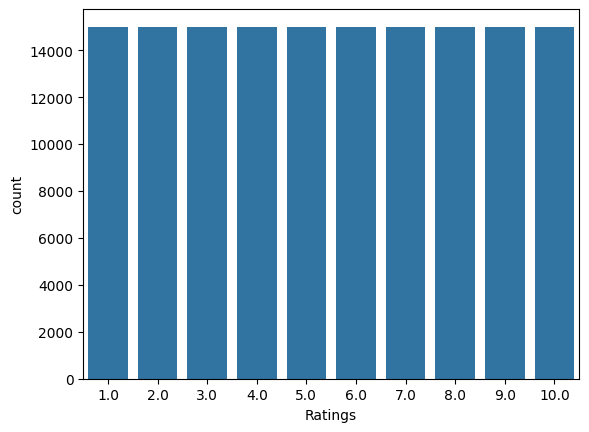

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [11]:
#Checking for Class Imbalance 
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

CPU times: total: 30.1 s
Wall time: 30.5 s


(-0.5, 1499.5, 799.5, -0.5)

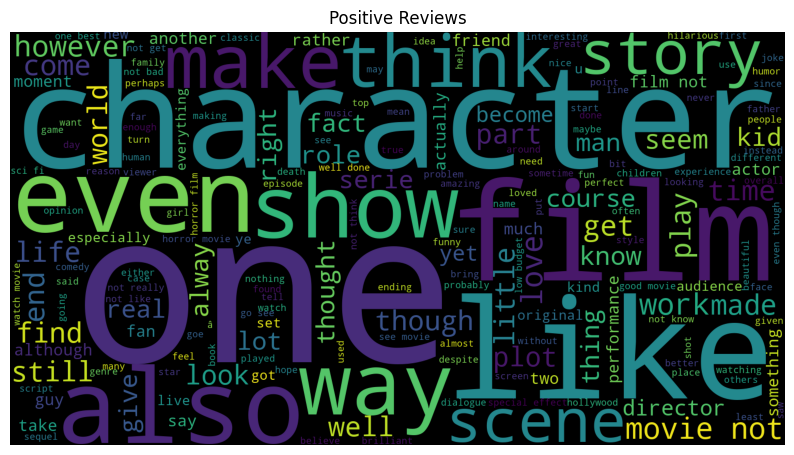

In [12]:
%%time
'''----------------------------Visualization of Important Words from Positive Reviews--------------------'''
sentences=df['Reviews_clean']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))
  
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

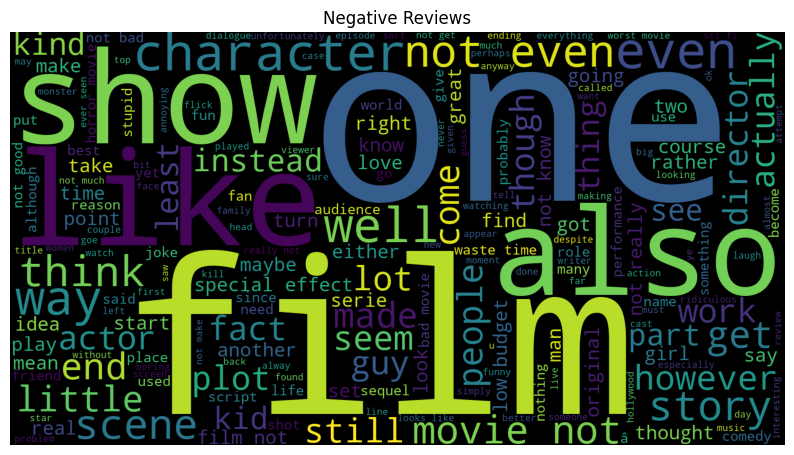

CPU times: total: 27.5 s
Wall time: 27.8 s


In [13]:
%%time
'''----------------------------Visualization of Important Words from Negative Reviews--------------------'''

neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

## Basic Statistic of Review data

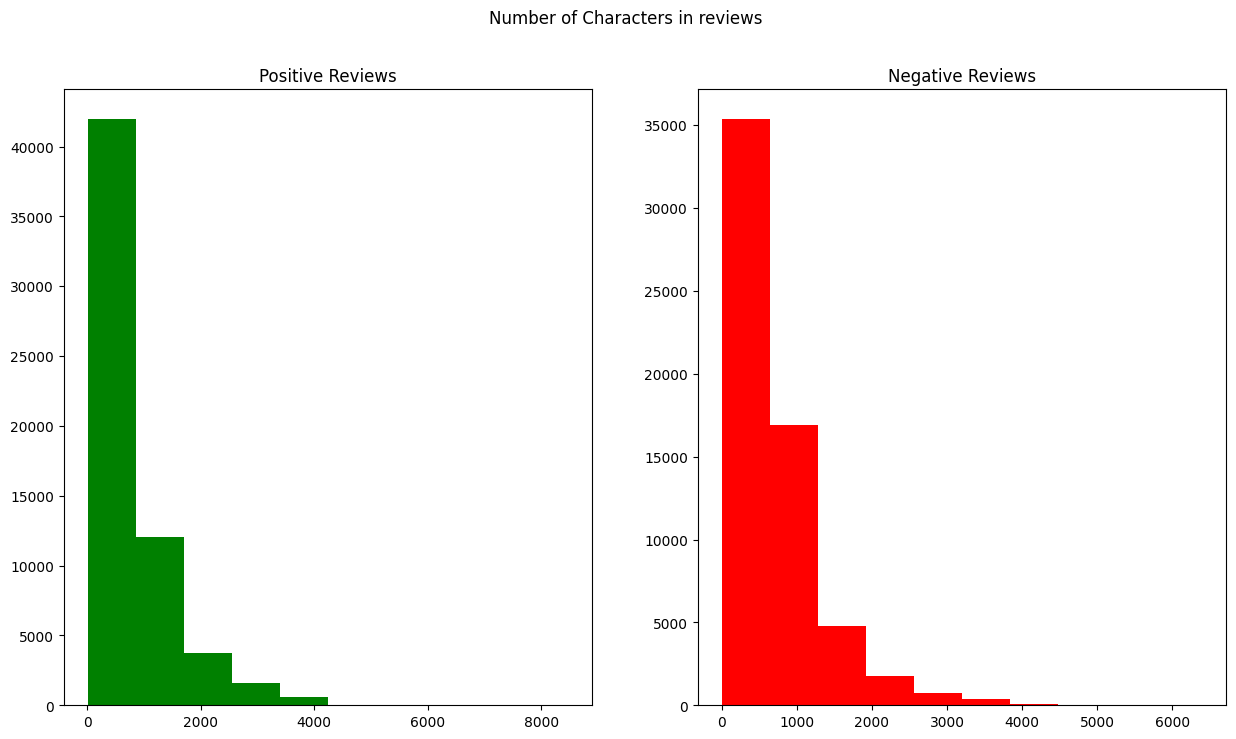

In [14]:
#Visulaization of number of charactor in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))

len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')

len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')

figure.suptitle('Number of Characters in reviews')
plt.show()

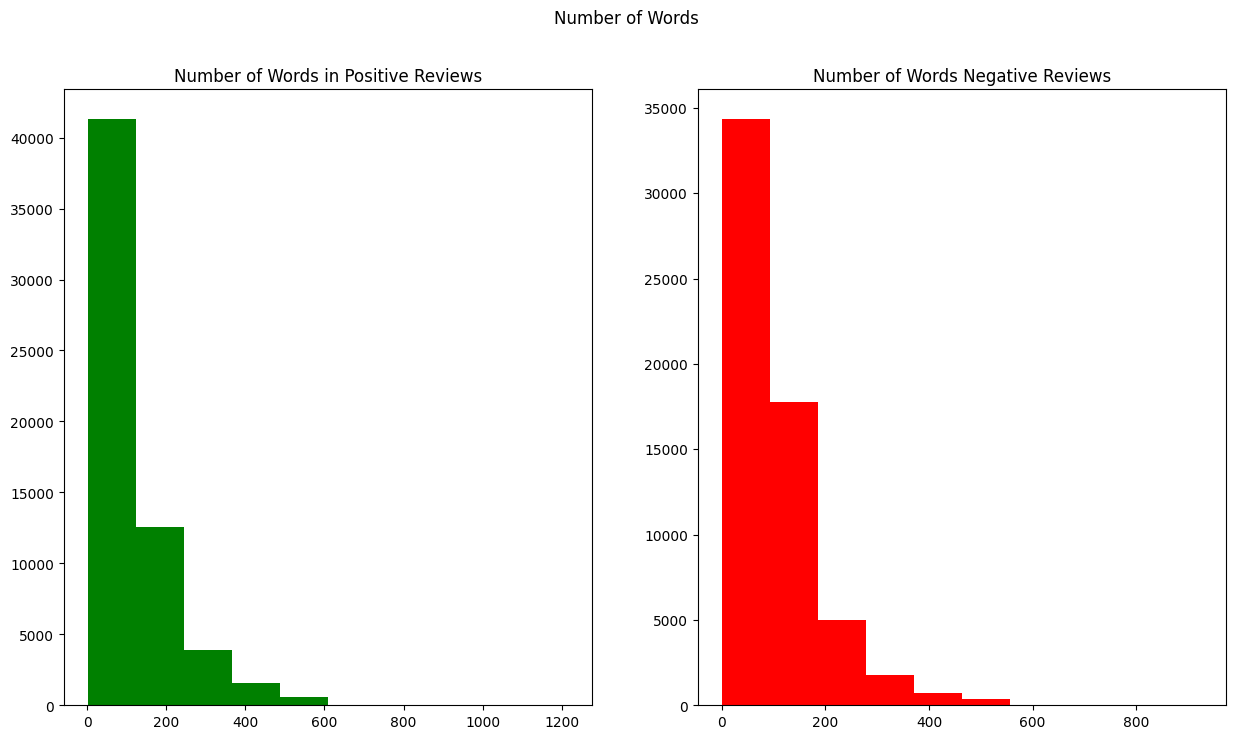

In [15]:
#Visulaization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2, figsize=(15,8))

pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')

neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')

figure.suptitle('Number of Words')
plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

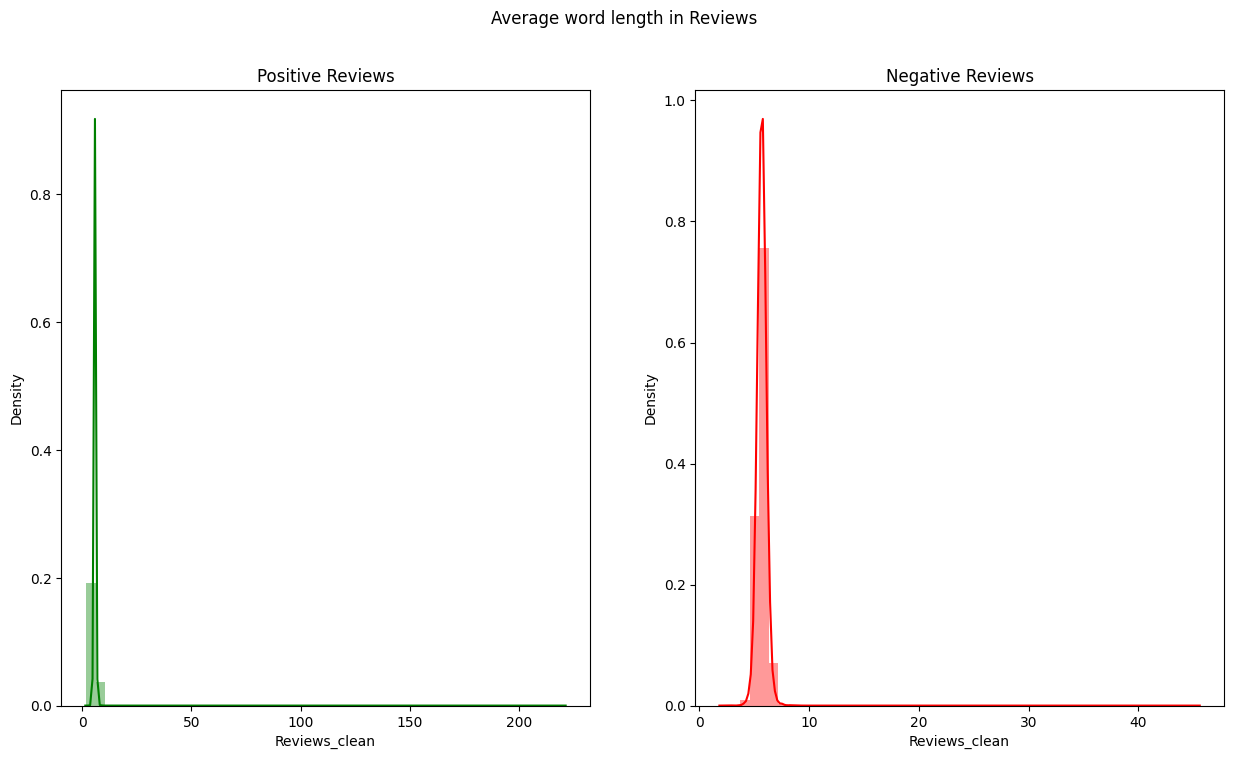

In [16]:
#Visulaize average of word length in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))

pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')

neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')

figure.suptitle('Average word length in Reviews')

In [17]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

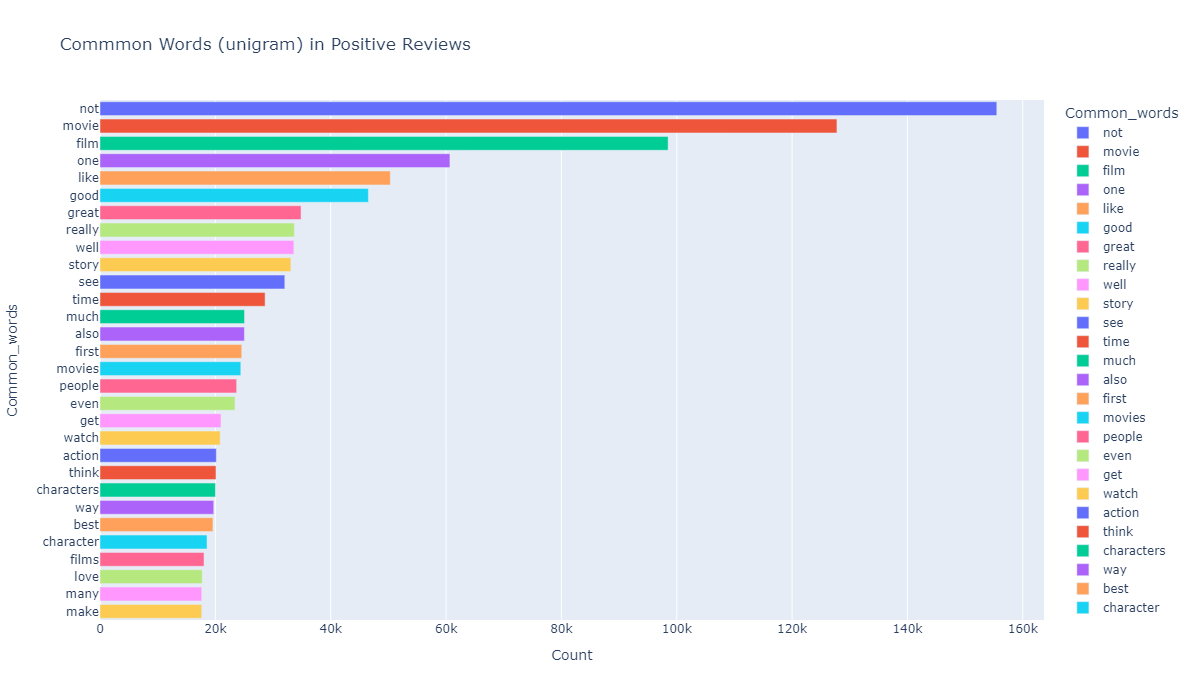

In [18]:
# Get most commonly used unigrams
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],30,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words (unigram) in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

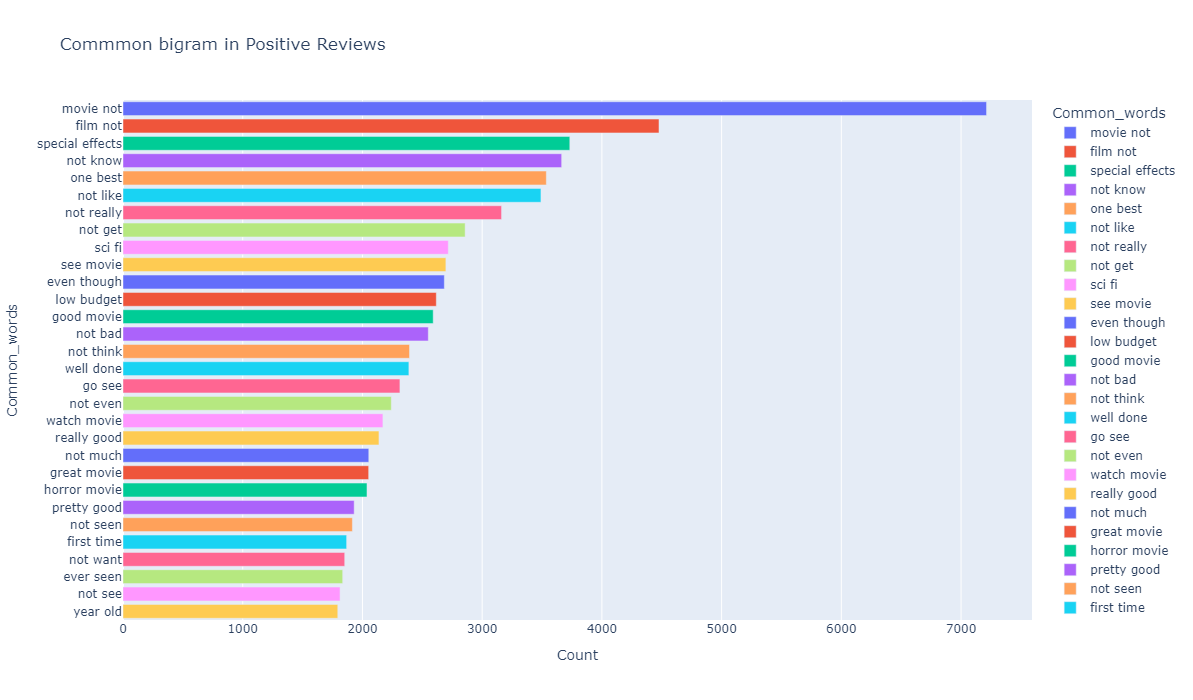

In [19]:
# Get most commonly used bigrams
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],30,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

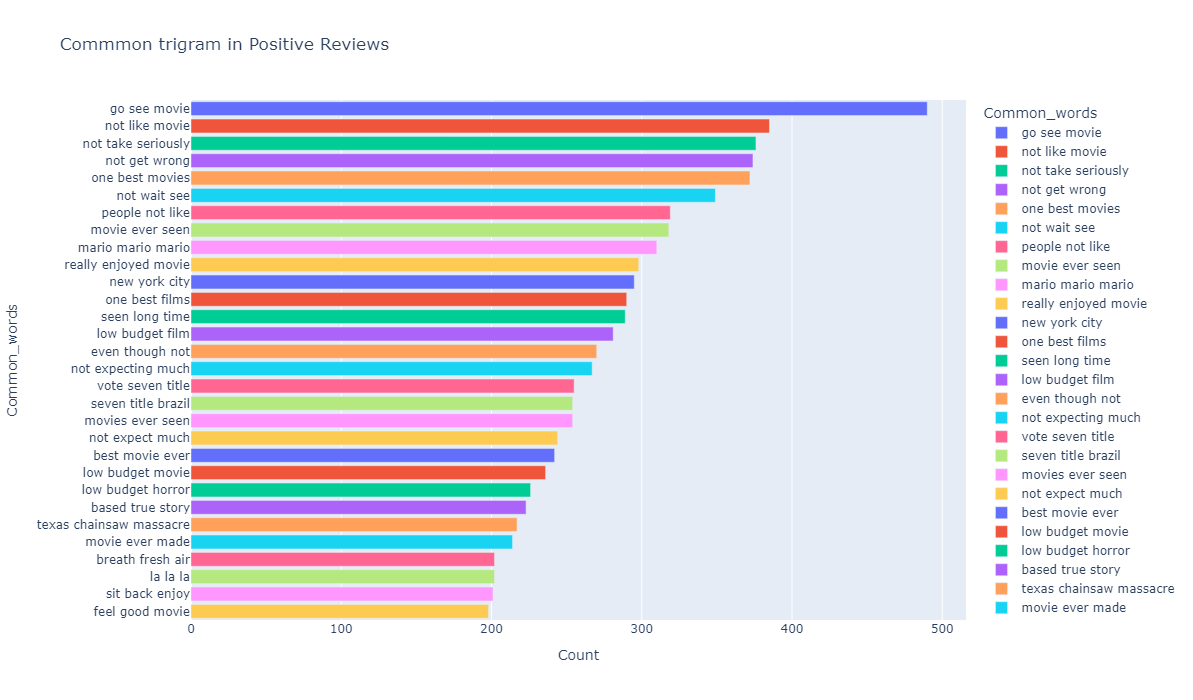

In [20]:
# Get most commonly used trigrams
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],30,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [21]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| not big fan"))].head(30)

Reviews  \
90193                                                                                                                                                                                                                                                                                                                                                                                              Starring: Carmen Electra and Brooke Hogan.Scary fish story that really has a lot going for it â Scares,Girls in bikinis and a creature that is NEW ! So let's go out to sea and study,No not like "The Suite Life On Deck",But more like Fred Olen Ray 'Showtime' movies in the water.There are villains without fins and people with Brains & Boobs.The creature effects are really good looking as CGI and just fun when do in real time and on set with actors interacting with the teeth plus.This ATOLL set would make a great tourist attraction with a re-tooled 'BRUCE the shark' that was replaced at Universal Studios,Florida.   
90198  Some folks really downgraded this movie and the two main stars, Casper Van Dien and Elelnia Eliniak by stating their careers were over because of this movie. Come on folks these two are professional actors and know how to act. This movie was not as horrible as some would have us believe nor did their careers end. Just because one did not like the movie is no reason to slam dunk the actors. The movie was actually quite good because of the two main stars It's quite conceivable for a character named Van Helsing not to know at one time in earths ancient culture he had a relative who was a vampire killer. As far as the script it was okay, the cinematography was good as far as one can be from being inside a spacecraft. The vampires exhibited great strength and stealth. They were tall dark and handsome or beautiful and tempting. In the end all the vampires were slain at the expense of most of the crew. To see which vampire remains and which crew members remain and how the movie ends which...   
90222  Alone in the Dark 2 is a fun little Supernatural Thriller with a good little cast & i enjoyed it, it looks like a movie & was actually filmed on film which was very rare back then, & even more rare now it's almost extinct, it's all digital now only "Tarantino" still uses film that I've heard of!!!\nAlso the film looks very good with good use of colour & a very slick look with lots of blue & green, a very cool opening actually with a view of new york city & central park, then we go down to central park where we meet 3 witch hunters running from the old Hag, it's very cool.\nThe first film was just ok, not great but not as terrible as all those way over the top reviews destroying it was saying, as there's alot of much worse films out there!!!\nThe music is really good, it's eerie & full of suspense & this little B-movie actually has a strong creepy atmosphere & feels like one of those rare Horror gems you find on t.v in the middle of the night, good solid film."Alone in the Dark 2" r...   
90251                                                                     You have to understand with these kinds of movies (boa vs. python,frankenfish, sasquatch hunters, rottweiler, tower of blood), you are not going to like it. You are going to think it was soo bad it was hilarious. Most importantly you cannot take it seriously as a movie. You have to also watch it with friends so you can all yell and say how stupid something was, or call something that is about to happen. I have seen about 8 movies like this one and I did not like one, but I had an amusing time watching it. WARNING: If you are looking for a scary movie or an interesting suspenseful movie DO NOT WATCH THIS! If you are on the other hand seeing something with friends, and you cant find a good comedy watch one of these. If you pick this movie out because you thought it would be cool, you should have been eliminated from the gene pool years ago. My personal favorite out of these 

In [22]:
#Get most commonly used 4-grams
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],30,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [23]:
#Get most commonly used 5-grams
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],30,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [24]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("mario mario mario mario mario| la la la la la| blah blah blah blah blah"))].head(30)

Reviews  \
136232                                                                                              loose plot, loose dialog, total and unabashed fluff, which is exactly what John Derek did best.you don't go judging a model by her brains. so don't go judging this movie w/intellect. just look.'nuff said.but this site wants more lines of text.so blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah   
139910                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             This movie, singlehandedly, saved my marriage. mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario   
141015  WOO! THIS MOVIE IS Awesome! I especially like MAX ELLIOT SLADE!! WOOT! My favorite ninja!! Anywho, it't really great, this movie and I recommend it for children... Don't ask why I watched it... I don't wanna grow up 0__0; DON'T LAUGH!!!!!!!! ><;; Now since I need ten lines of comments... La la la la la la la la la la la la la lala la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la *cough* la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la.... Later!!   

        Ratings              Movies  
136232     10.0              Bolero  
139910     10.0   Super Mario Bros.  
141015     10.0  3 Ninjas Kick Back

In [25]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],30,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon unigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [26]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],30,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [27]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],30,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [28]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],30,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [29]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],30,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [30]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("good|great"))].head(30)

Reviews  \
3   If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...   
6   I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but "Disaster Movie" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged "jokes" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out but "Disaster Movie" may just...   
7                                                                                                                                                                                                                                                                                  OK, so "Disastrous" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he "pissed his pants" at the trailer had free passes. I think he's incontinent.A spoof of disaster movies might have been fun. This is not it. A couple disaster movies get referenced, not really spoofed. Instead, the "spoofing" is of recent movies of all genres, and of aspects of current pop-culture. Then again, how current is women's wrestling or the "Head On" commercials?If there's anything about it that's good, there's the 70 minute or so running time (where did they get 90 minutes?) and Nicole Parker seems like she might be good, if she had good material.   
11                                                                                                                                                                                                                                                                                               I decided to go see this movie with some friends, just to have a laugh. We were hoping that it would be so bad that it would become funny. But it was just awful... I just cant take that kid seriously.Also, this movie just confirmed what we all knew, JB has an ego even bigger then Kayne West. The entire movie was like: "Look at me, i'm a talented singer and a good person! There is simply nothing that i can't do!"What the movie forgot to mention is that its his mommies fat cigar smoking managers that made JB. he's a puppet. This movie could make him look better, but it just buried him deeper. I'm starting to think that this was done on purpose because the fat cats want to 

In [31]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("saturday night friday"))].head(30)

Reviews  \
7055   STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning NO STARS End of Days A made for TV biopic of the pop icon Britney Spears (Natasha Bassett), from starting out with her breakthrough single Baby One More Time in 1999, where she was shoved into the limelight by her pushy mother Lynne (Nicole Oliver) and domineering manager Larry Rudolph (Peter Benson), who both naively thought she was old and mature enough to handle such massive media exposure and pushed her to lie about her virginity to keep up an illusion, through to the trials and turbulence of her relationships with Justin Timberlake (Nathan Keyes) and Kevin Federline (Clayton Chitty), before a revealing 2008 documentary aired.Sometimes, something can give you a really bad vibe, yet you still feel utterly compelled to see it. Your instinct can tell you it looks really bad, and you can see no end of bad reviews, and you can almost write a review before you've even seen it, but ...   
17427  STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday MorningWill (Joey Pollairi) is the new guy in high school, who stands out as a prime target for bullies. He soon makes friends with Jay (Zach Pearlman), Simon (Bubba Lewis) and Neil (Mark L. Young), three other social misfits who are not complete dorks but far from the coolest kids in school, either.It always spurs you on as a Brit when something home grown becomes a success, as I imagine it probably does for anyone from a small country that's not at the centre of the world (not anymore, anyway.) But it's a sad thing and a sign of the times when the only way to tell what a massive success it's been is when the Americans go and remake it. In fact, this is almost inevitable. And, inevitably, a whole lot worse.The best way I can describe The Inbetweeners USA is: imagine you've just read a really great Stephen King novel, and then see a film adaptation of it that is just like what you've rea...   
17818                   STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning The premise behind this abysmal action thriller has a group of people going for a good old bit of paint ball, only to find themselves really fighting to stay alive as a barrage of real bullets are fired at them. But the characters are never developed or explored in any way, so it's impossible to care about any of them. Needless to say, there is no air of tension or suspense whatsoever, and the acting is so bad none of them have any life anyway, as though just running around shouting and screaming incoherently at each other gives them any life. Not that there was anything special to see there anyway, just the usual generic stereotypes typical for this genre. And here we have yet another film that hasn't learned the modern trend of shaking the camera around and darkening the lens is an off putting and annoying one rather than an endearing one. One to flee all round. *   
18138  STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning I could go to great pains to write a long, in depth review of The Last Seven, but it's hard to write much more about it other than my summary above. Right from the opening sequence, with one of the lead characters wondering around a deserted London shouting out for 'anybody!', just like in the aforementioned film, it just feels like such a pale imitation of it that it hurts. In fact, it's almost as if the director knew he was practically copying it scene for scene and just gave up bothering to tell any sort of decent story of his own. As such, it just goes through the motions of the post apocalyptic thriller genre, with the usual stereo-typical set up and characters, without firmly establishing the back story behind the majority of humanity being wiped out and making no sense. Most baffling is Danny Dyer's role as some sort of blood cra

# Feature Engineering   and Feature Selection

In [32]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing 
df=df[df.Label<'2']
data=df[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
0    60000
1    60000
Name: count, dtype: int64


In [33]:
data.head()

Reviews_clean  \
0  disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserv...   
1                                                               writing hopes gets put previous review film anyone find slop entertaining completely beyond first spoof film entitled disaster movie indeed spoof disaster films seen yes count disaster film spoofed twister juno iron man batman hulk alvin chipmunks amy winehouse hancock register disaster films selzterwater failburg shown lack sort writing skill humor unfortunately tortured date movie epic movie know exactly expect two plot jokes bad references cheaply remade scenes films someone informed satire copy paste one film another though not say actually seem taken trailers nothing clever witty remotely smart way two write not believe people still pay see travesties insult audience though enjoy films doubt smart enough realize rating unfortunately not number low enough yes includes negatives rate deserves top worst films time right date movie epic faliure mean movie meet spartans rather forced hour manos hands fate marathon watch slop   
2                                                                                                                                                                                                                                                                                                                                                really write scathing review turd sandwich instead going making observations points deduced point watching movies anymore reader remember scary movie remember original comedic elements slapstick funny lines pretty forgettable comedy worth price admission well last time premise funny stop making movies please call boycott pieces monkey sh know going line pre pubescent annoying little buggers spouting crappy one liners like sparta im rick james bitch movies continue make form monetary gain considering production value movie looks like cost cents make not see movie not spend money go home rent airplane laugh ass silently judge people talking movie monday favor   
3  saw previous spoof movies two horrible gentlemen know already bad tell truth want watch brainless person ironically meant stereotypical teenagers not laugh bit judge even little movie automatically fails never ask comes two men remember good old hollywood days whenever making movie showing people type art also story kept edge seat well whenever word hit making films earned loads cash greedy people came picture quite pathetic two exception still movie artists notably genius christopher nolan two guys well writing big words let put simple terms guys guys suck not artists instead money craving whores latest movie proves even movie fails easily mind blowing mean nothing funny trailer people usually put best stuff like idiots sometimes knew going bad made bet friends not good idea write movie reviews paper tell everyone whats good whats bad friends flipped review well warning least not even called movie nothing artistic original jokes sorry references m

## Lemmatization

In [34]:
# lemmatization of word 
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

## Vectorization with Count Vectorizer and TFIDF Vectorizer with Unigram

In [35]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [36]:
print(x_train_tfidf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.0618426  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.06185878 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Feature Importance with Logistic Regression and Count Vectorizer with unigram


In [37]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |  0.09986155596535881   |
|   absolutely   |  0.04983270402352913   |
|      act       |  -0.15654893570385525  |
|     acting     |  -0.16642343664051976  |
|     action     |   0.2681268887762595   |
|     actor      |  -0.12968287248961968  |
|    actress     |  -0.14862084501172473  |
|    actually    |  -0.05149402107994811  |
|      add       |  0.02630203156546268   |
|     adult      |  0.05969382172630485   |
|      age       |  0.09843571932269553   |
|     alien      |  -0.07247763435011338  |
|     almost     | -0.014949635394467106  |
|     along      |  0.12359438033404113   |
|    already     |  -0.20424227584136112  |
|      also      |   0.097087312400729    |
|    although    |  0.19654426854966342   |
|     always     |  0.20084820264892506   |
|    amazing     |   0.8412641548215916   |
|    american    |  0.0547409340

## Feature Importance with Logistic Regression and TFIDF vectorizer  with Unigram

In [38]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|      able      |  0.38629010134358865  |
|   absolutely   |   0.482914562118931   |
|      act       |  -1.0494744120910628  |
|     acting     |  -1.6534781858038803  |
|     action     |   2.6578864836195266  |
|     actor      |   -1.360115017049474  |
|    actress     |  -1.0105316360043428  |
|    actually    |  -0.47142175283728904 |
|      add       |   0.1347568054172561  |
|     adult      |   0.6889974217207833  |
|      age       |   0.760311041960574   |
|     alien      |   -0.337594317782023  |
|     almost     |  -0.29102962360763945 |
|     along      |    0.74567325344192   |
|    already     |  -1.1392268834446313  |
|      also      |   1.218577593672241   |
|    although    |   1.2302111044073163  |
|     always     |   1.7060411768615902  |
|    amazing     |   4.794623456850968   |
|    american    |   0.4626446441562715  |
|    annoyi

## Vectorization with Count Vectorizer and TFIDF Vectorizer with Bigram

In [39]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

## Feature Importance with Logistic Regression and Count Vectorizer with Bigram

In [40]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+------------------------+
|        Feature        |         Score          |
+-----------------------+------------------------+
|       acting bad      |   -1.359133965028007   |
|      acting good      |   0.6548244019516698   |
|       acting not      |  -0.46782460651723234  |
|      action film      |  0.36994643879124467   |
|      action movie     |  0.29106328524927216   |
|     action packed     |   1.3385475204933361   |
|      action scene     |   0.1751898496738003   |
|    action sequence    |  0.10151670556620865   |
|     actor actress     |  -0.12544256492348382  |
|       actor not       |  -0.39157628340451345  |
|      almost every     |  -0.13259095033784726  |
|       along way       |  0.49091776297061107   |
|        also not       |  -0.13977484170665655  |
|      although not     |   0.4990845753841019   |
|     anything else     |  -0.3232330769022372   |
|        b movie        |  -0.09072145515881717  |
|       bad acting      |  -1.0

## Feature Importance with Logistic Regression and TFIDF Vectorizer with Bigram

In [41]:
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+----------------------+
|        Feature        |        Score         |
+-----------------------+----------------------+
|       acting bad      | -2.9871609299776654  |
|      acting good      |  1.443180367971571   |
|       acting not      | -1.2744674917958314  |
|      action film      |  1.2237723998675534  |
|      action movie     |  0.8443959744945735  |
|     action packed     |  3.0238372422836597  |
|      action scene     | 0.47013387497092096  |
|    action sequence    |  0.2964480937780432  |
|     actor actress     | -0.26126909372496876 |
|       actor not       | -0.9337914314472064  |
|      almost every     | -0.29474053370074554 |
|       along way       |  1.0752843592797066  |
|        also not       | -0.2909445902101145  |
|      although not     |  1.1043373609181646  |
|     anything else     | -0.7966125528828969  |
|        b movie        | -0.4228574857254086  |
|       bad acting      |  -2.799504194298253  |
|        bad bad    

In [42]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews_clean'].str.contains("bad review"))].head(100)

Reviews  \
120047                                                                                                                                                                                                                                                               While I wouldn't call this the greatest movie ever made, it's not anywhere near as bad as other reviewers have made it out to be. An average rating of 5 or 6 stars would be fair, but 1.5 is harsh and totally undeserved.Ring of Terror feels like an episode of The Twilight Zone stretched to an hour. In fact, it's so much like a TV show that one wonders if it might not have been originally created as a pilot.If you're a fan of 1950s horror/suspense series like Thriller, The Veil, One Step Beyond, Tales of Tomorrow, and Alfred Hitchcock Presents, you'll likely find this a pleasant way to spend an hour, as I did.Normally I would only give this film 6 out of 10 stars, but because others have been panning it so unmercifully, I'm giving it a 9.   
120211                                                                                                                                                                                                                                                                                    This movie was a blast for my little guys, they loved every minute of it, I have read all of the bad reviews, and could not disagree more. This movie, is pure and good. There is just enough action to keep the kids interested, and not so much that you leave the theater with them bouncing off the walls either. It is funny with jokes that everyone can appreciate. I think people have gotten used to so much violence and adult content in our kids movies that they are disappointed when it is missing, like the movie wasn't entertaining enough for the parents. Well, NEWS FLASH.....It's a kids movie, and a perfect one at that. Kids need these kinds of movies, not Spongebob and the like which are more to entertain the parents.   
120238                                                                                                                                                                                                                                                                                      I am a huge horror buff and prefer pieces that delve into the characters psychological issues. This film was awesome on so many levels, the acting and writing were fantastic and creepy and I was afraid or and empathetic with the murderer the whole time. What an interesting study on the line between sick and a danger to others, and the line between being a mean girl and being psychotic. Set in a great location, a house full of creepy art, in the winter in Conneticut and with amazing performances from many of my favorite actresses. It actually shocks me that others have given this such a bad review, I loved this movie, I guess it goes to show you everyone will have a different opinion but I say don't miss this film!   
120239                                                                                                                                                                                                                                                                                                   No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not "get"a film about social media an

## Vectorization with Count Vectorizer and TFIDF Vectorizer with Trigram

In [43]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

## Feature Importance with Logistic Regression and Count Vectorizer with Trigram

In [44]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+------------------------+
|          Feature          |         Score          |
+---------------------------+------------------------+
|       acting not bad      |  -0.41605479667969014  |
|      acting not good      |   -1.060842284481334   |
|      acting not great     |  -0.46739388959888284  |
|     acting pretty good    |   0.9604425825655488   |
|      acting top notch     |   1.8064792887915857   |
|      action movie not     |   1.0284071696210766   |
|      action set piece     |   1.216646035849239    |
|     action take place     |  0.042476552391418794  |
|       actor good job      |   0.5960771834821292   |
|    actually pretty good   |   0.3068315138235187   |
|    actually quite good    |  -0.16411628852492804  |
|     almost every scene    |  -0.3190691118447264   |
|        b movie not        |  -0.04725855870522911  |
|       bad acting bad      |   -2.328240603338255   |
|        bad bad bad        |  -1.7686134848672475   |
|        b

## Feature Importance with Logistic Regression and TFIDF Vectorizer with Trigram

In [45]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+------------------------+
|          Feature          |         Score          |
+---------------------------+------------------------+
|       acting not bad      |  -0.5732816864237749   |
|      acting not good      |  -1.3107700909229685   |
|      acting not great     |  -0.6602718882686432   |
|     acting pretty good    |    1.09325792906191    |
|      acting top notch     |   2.0746492612736085   |
|      action movie not     |   1.2045913597258497   |
|      action set piece     |   1.2430029177905786   |
|     action take place     |  0.09013657404264265   |
|       actor good job      |   0.6812433617677007   |
|    actually pretty good   |  0.33819941787637925   |
|    actually quite good    |  -0.14193988072097705  |
|     almost every scene    |  -0.3818008160229795   |
|        b movie not        |  -0.09272409099386669  |
|       bad acting bad      |   -2.858563396254929   |
|        bad bad bad        |  -2.5936064585273746   |
|        b

## Vectorization with Count Vectorizer and TDIDF Vectorizer with 4-gram

In [46]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

## Feature Importance with Logistic Regression and Count Vectorizer with 4-gram


In [47]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+-----------------------+
|                    Feature                     |         Score         |
+------------------------------------------------+-----------------------+
|         according dvd sleeve synopsis          |   -2.254569546333559  |
|           acting also great special            |   0.3574987339529696  |
|             acting bad script bad              |  -1.0274211884409048  |
|     addictive consistently compelling show     |  0.07279038856755544  |
|                 ai not gon na                  |   -0.487308328029148  |
|           also great special effect            |   0.770531668699156   |
|       annoying illogical decision making       | -0.036401551136203775 |
|           another film seen recently           | -0.038865443184143936 |
|         appreciation horror low budget         |  -0.10976598356688573 |
|        atmosphere dreary due excessive         |  -0.04064045945386136 |
|         atmospheric bea

## Feature Importance with Logistic Regression and TFIDF Vectorizer with 4-gram

In [48]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+-----------------------+
|                    Feature                     |         Score         |
+------------------------------------------------+-----------------------+
|         according dvd sleeve synopsis          |  -2.2728234863731136  |
|           acting also great special            |   0.6744187057552341  |
|             acting bad script bad              |   -1.313514238654348  |
|     addictive consistently compelling show     |  0.24700512847222456  |
|                 ai not gon na                  |  -0.47533923703858055 |
|           also great special effect            |   1.0330901038073732  |
|       annoying illogical decision making       |  -0.22585405492656344 |
|           another film seen recently           |  -0.2455966341610561  |
|         appreciation horror low budget         |  -0.27657853294949025 |
|        atmosphere dreary due excessive         |  -0.2585822875329084  |
|         atmospheric bea

In [49]:
# We can remove 4-grams from our  final pipeline as value of scores is very less when compared to unigrams, bigrams and trigrams

## Vectorization with Count Vectorizer and TDIDF Vectorizer with unigram, bigram and trigram

In [50]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

##   Feature Selection with Chi squared

In [51]:


N = 5000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

1. 1 :
	# Unigrams :
	. spirited
	. jail
	. returning
	. nicole
	. survivor
	. deliberately
	. huge
	. claude
	. ashley
	. oil
	. member
	. appearance
	. pre
	. join
	. land
	. exorcism
	. forth
	. characterization
	. finding
	. steven
	. spite
	. item
	. reporter
	. flying
	. inspiration
	. speaks
	. tie
	. twin
	. fairly
	. religious
	. energy
	. freak
	. jay
	. halloween
	. rap
	. football
	. hook
	. starring
	. chief
	. second
	. judging
	. rank
	. vacation
	. fare
	. air
	. chasing
	. broken
	. remaining
	. club
	. starting
	. colour
	. grey
	. comparison
	. heavy
	. professional
	. meaningful
	. confusion
	. needed
	. ant
	. journalist
	. believed
	. shadow
	. african
	. wow
	. saturday
	. argue
	. exchange
	. traveling
	. person
	. virus
	. occur
	. numerous
	. quick
	. usa
	. river
	. develop
	. tower
	. training
	. decides
	. road
	. butt
	. laura
	. birthday
	. dick
	. exaggerated
	. sea
	. arrive
	. wise
	. prior
	. strike
	. pregnant
	. boot
	. whenever
	. accident
	. offic

2. 0 :
	# Unigrams :
	. spirited
	. jail
	. returning
	. nicole
	. survivor
	. deliberately
	. huge
	. claude
	. ashley
	. oil
	. member
	. appearance
	. pre
	. join
	. land
	. exorcism
	. forth
	. characterization
	. finding
	. steven
	. spite
	. item
	. reporter
	. flying
	. inspiration
	. speaks
	. tie
	. twin
	. fairly
	. religious
	. energy
	. freak
	. jay
	. halloween
	. rap
	. football
	. hook
	. starring
	. chief
	. second
	. judging
	. rank
	. vacation
	. fare
	. air
	. chasing
	. broken
	. remaining
	. club
	. starting
	. colour
	. grey
	. comparison
	. heavy
	. professional
	. meaningful
	. confusion
	. needed
	. ant
	. journalist
	. believed
	. shadow
	. african
	. wow
	. saturday
	. argue
	. exchange
	. traveling
	. person
	. virus
	. occur
	. numerous
	. quick
	. usa
	. river
	. develop
	. tower
	. training
	. decides
	. road
	. butt
	. laura
	. birthday
	. dick
	. exaggerated
	. sea
	. arrive
	. wise
	. prior
	. strike
	. pregnant
	. boot
	. whenever
	. accident
	. offic

# Model Selection

## Logistic Regression

In [52]:
model_1 = Pipeline(steps=[("classifier", LogisticRegression())])                                        

## Training of Logistic Regression Model

In [53]:
%%time
model_1.fit(x_train_tfidf,y_train)

CPU times: total: 10min 47s
Wall time: 45 s


Pipeline(steps=[('classifier', LogisticRegression())])

## Evaluation on Test and Train dataset

In [54]:
%%time
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.9094880952380953
AUC Score on training dateset for Logistic Regression: 0.968710522386266
F1 Score ftraining dateset for Logistic Regression: 0.9094866003836708
Precision Score on test for Logistic Regression: 0.8929722222222222
AUC Score on test for Logistic Regression: 0.9582785522559808
F1 Score for Logistic Regression: 0.892974121617611
CPU times: total: 14.4 s
Wall time: 4.1 s


## Decision Tree Classifier

In [55]:
model_2 = Pipeline(steps=[("classifier", DecisionTreeClassifier())])

## Training of Decision Tree Classifier

In [56]:
%%time
model_2.fit(x_train_tfidf,y_train)

CPU times: total: 5min 4s
Wall time: 5min 6s


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

## Evaluation on test data and training data of Decision Tree Classifier

In [57]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

# Model performs well on training data but performs poorly on testing data (Overfitting)

Precision Score on training dateset for Decision Tree Classifier: 0.9999523809523809
AUC Score on training dateset for Decision Tree Classifier: 0.9999999912130244
F1 Score training dateset for Decision Tree Classifier: 0.9999523809609115
Precision Score on test for Decision Tree Classifier: 0.7179722222222222
AUC Score on test for Decision Tree Classifier: 0.7182069540062426
F1 Score for Decision Tree Classifier: 0.7179769296118479
CPU times: total: 5.28 s
Wall time: 5.39 s


## Random Forest Classifier

In [58]:
model_3 = Pipeline(steps=[("classifier", RandomForestClassifier())])

## Training of Random Forest Classifier

In [59]:
%%time
model_3.fit(x_train_tfidf,y_train)

CPU times: total: 3min 55s
Wall time: 3min 58s


Pipeline(steps=[('classifier', RandomForestClassifier())])

## Evaluation on test data and training data of Random Forest Classifier

In [60]:
%%time
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_3)

Precision Score on training dateset for Random Forest Classifier: 0.9999523809523809
AUC Score on training dateset for Random Forest Classifier: 0.9999990439203652
F1 Score training dateset for Random Forest Classifier: 0.9999523809609115
Precision Score on test for Random Forest Classifier: 0.8529166666666667
AUC Score on test for Random Forest Classifier: 0.9260868420467792
F1 Score for Random Forest Classifier: 0.852916253413817
CPU times: total: 26.5 s
Wall time: 26.7 s


## Hyperparameter Tunning with Grid Search

In [68]:
def hyperparamtune(classifier, param_grid,metric,verbose_value,cv):
    
    model=sk.model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring=metric,
            verbose=verbose_value,            
            cv=cv)

    model.fit(x_train_tfidf,y_train)
    print("Best Score %s" % {model.best_score_})
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model, best_parameters

## Hyperparameter tunning of Logistic Regression

In [71]:
%%time
param_gd={"penalty":["l2","l1"],
         "C":[0.01,0.1,1.0,10],
         "tol":[0.0001,0.001,0.01],
         "max_iter":[100,200]}
model_7, best_param = hyperparamtune(LogisticRegression(),param_gd,"accuracy",10,5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 1/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.856 total time=   6.8s
[CV 2/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 2/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.856 total time=   6.0s
[CV 3/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 3/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.859 total time=   6.1s
[CV 4/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 4/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.858 total time=   5.1s
[CV 5/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 5/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.855 total time=   5.6s
[CV 1/5; 2/48] START C=0.01, max_iter=100, penal

[CV 2/5; 10/48] END C=0.01, max_iter=200, penalty=l1, tol=0.0001;, score=nan total time=   0.6s
[CV 3/5; 10/48] START C=0.01, max_iter=200, penalty=l1, tol=0.0001..............
[CV 3/5; 10/48] END C=0.01, max_iter=200, penalty=l1, tol=0.0001;, score=nan total time=   0.5s
[CV 4/5; 10/48] START C=0.01, max_iter=200, penalty=l1, tol=0.0001..............
[CV 4/5; 10/48] END C=0.01, max_iter=200, penalty=l1, tol=0.0001;, score=nan total time=   0.5s
[CV 5/5; 10/48] START C=0.01, max_iter=200, penalty=l1, tol=0.0001..............
[CV 5/5; 10/48] END C=0.01, max_iter=200, penalty=l1, tol=0.0001;, score=nan total time=   0.5s
[CV 1/5; 11/48] START C=0.01, max_iter=200, penalty=l1, tol=0.001...............
[CV 1/5; 11/48] END C=0.01, max_iter=200, penalty=l1, tol=0.001;, score=nan total time=   0.6s
[CV 2/5; 11/48] START C=0.01, max_iter=200, penalty=l1, tol=0.001...............
[CV 2/5; 11/48] END C=0.01, max_iter=200, penalty=l1, tol=0.001;, score=nan total time=   0.5s
[CV 3/5; 11/48] START

[CV 4/5; 19/48] END C=0.1, max_iter=200, penalty=l2, tol=0.0001;, score=0.881 total time=  15.4s
[CV 5/5; 19/48] START C=0.1, max_iter=200, penalty=l2, tol=0.0001...............
[CV 5/5; 19/48] END C=0.1, max_iter=200, penalty=l2, tol=0.0001;, score=0.882 total time=  18.7s
[CV 1/5; 20/48] START C=0.1, max_iter=200, penalty=l2, tol=0.001................
[CV 1/5; 20/48] END C=0.1, max_iter=200, penalty=l2, tol=0.001;, score=0.882 total time=  17.9s
[CV 2/5; 20/48] START C=0.1, max_iter=200, penalty=l2, tol=0.001................
[CV 2/5; 20/48] END C=0.1, max_iter=200, penalty=l2, tol=0.001;, score=0.880 total time=  14.1s
[CV 3/5; 20/48] START C=0.1, max_iter=200, penalty=l2, tol=0.001................
[CV 3/5; 20/48] END C=0.1, max_iter=200, penalty=l2, tol=0.001;, score=0.881 total time=  18.2s
[CV 4/5; 20/48] START C=0.1, max_iter=200, penalty=l2, tol=0.001................
[CV 4/5; 20/48] END C=0.1, max_iter=200, penalty=l2, tol=0.001;, score=0.881 total time=  15.0s
[CV 5/5; 20/48] S

[CV 1/5; 29/48] END C=1.0, max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.6s
[CV 2/5; 29/48] START C=1.0, max_iter=100, penalty=l1, tol=0.001................
[CV 2/5; 29/48] END C=1.0, max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.5s
[CV 3/5; 29/48] START C=1.0, max_iter=100, penalty=l1, tol=0.001................
[CV 3/5; 29/48] END C=1.0, max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.5s
[CV 4/5; 29/48] START C=1.0, max_iter=100, penalty=l1, tol=0.001................
[CV 4/5; 29/48] END C=1.0, max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.5s
[CV 5/5; 29/48] START C=1.0, max_iter=100, penalty=l1, tol=0.001................
[CV 5/5; 29/48] END C=1.0, max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.5s
[CV 1/5; 30/48] START C=1.0, max_iter=100, penalty=l1, tol=0.01.................
[CV 1/5; 30/48] END C=1.0, max_iter=100, penalty=l1, tol=0.01;, score=nan total time=   0.5s
[CV 2/5; 30/48] START C=1.0, max

[CV 3/5; 38/48] END C=10, max_iter=100, penalty=l2, tol=0.001;, score=0.891 total time=  37.3s
[CV 4/5; 38/48] START C=10, max_iter=100, penalty=l2, tol=0.001.................
[CV 4/5; 38/48] END C=10, max_iter=100, penalty=l2, tol=0.001;, score=0.891 total time=  39.6s
[CV 5/5; 38/48] START C=10, max_iter=100, penalty=l2, tol=0.001.................
[CV 5/5; 38/48] END C=10, max_iter=100, penalty=l2, tol=0.001;, score=0.890 total time=  37.7s
[CV 1/5; 39/48] START C=10, max_iter=100, penalty=l2, tol=0.01..................
[CV 1/5; 39/48] END C=10, max_iter=100, penalty=l2, tol=0.01;, score=0.888 total time=  39.1s
[CV 2/5; 39/48] START C=10, max_iter=100, penalty=l2, tol=0.01..................
[CV 2/5; 39/48] END C=10, max_iter=100, penalty=l2, tol=0.01;, score=0.889 total time=  38.2s
[CV 3/5; 39/48] START C=10, max_iter=100, penalty=l2, tol=0.01..................
[CV 3/5; 39/48] END C=10, max_iter=100, penalty=l2, tol=0.01;, score=0.891 total time=  35.7s
[CV 4/5; 39/48] START C=10, 

[CV 5/5; 47/48] END C=10, max_iter=200, penalty=l1, tol=0.001;, score=nan total time=   0.5s
[CV 1/5; 48/48] START C=10, max_iter=200, penalty=l1, tol=0.01..................
[CV 1/5; 48/48] END C=10, max_iter=200, penalty=l1, tol=0.01;, score=nan total time=   0.5s
[CV 2/5; 48/48] START C=10, max_iter=200, penalty=l1, tol=0.01..................
[CV 2/5; 48/48] END C=10, max_iter=200, penalty=l1, tol=0.01;, score=nan total time=   0.6s
[CV 3/5; 48/48] START C=10, max_iter=200, penalty=l1, tol=0.01..................
[CV 3/5; 48/48] END C=10, max_iter=200, penalty=l1, tol=0.01;, score=nan total time=   0.5s
[CV 4/5; 48/48] START C=10, max_iter=200, penalty=l1, tol=0.01..................
[CV 4/5; 48/48] END C=10, max_iter=200, penalty=l1, tol=0.01;, score=nan total time=   0.7s
[CV 5/5; 48/48] START C=10, max_iter=200, penalty=l1, tol=0.01..................
[CV 5/5; 48/48] END C=10, max_iter=200, penalty=l1, tol=0.01;, score=nan total time=   0.6s
Best Score {0.8929523809523809}
Best hyper

## Evaluation of FineTuned Logsitic Regression Classifier

In [76]:
%%time
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("Recall Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % recall_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("Accuracy Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % accuracy_score(y_train,model_7.predict(x_train_tfidf)))
print("AUC Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logsitic Regression Classifier: %s" % f1_score_train_7)

print("\n")

print("Precision Score on test for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("Recall Score on test for Finetuned Logsitic Regression Classifier: %s" % recall_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("Accuracy Score on test for Finetuned Logsitic Regression Classifier: %s" % accuracy_score(y_test,model_7.predict(x_test_tfidf)))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

Precision Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9094880952380953
Recall Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9094880952380953
Accuracy Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9094880952380953
AUC Score on training dateset for Finetuned Logsitic Regression Classifier: 0.968710522386266
F1 Score training dateset for Finetuned Logsitic Regression Classifier: 0.9094866003836708


Precision Score on test for Finetuned Logsitic Regression Classifier: 0.8929722222222222
Recall Score on test for Finetuned Logsitic Regression Classifier: 0.8929722222222222
Accuracy Score on test for Finetuned Logsitic Regression Classifier: 0.8929722222222222
AUC Score on test for Finetuned Logsitic Regression Classifier: 0.9582785522559808
F1 Score for Finetuned Logsitic Regression Classifier: 0.892974121617611
CPU times: total: 21.3 s
Wall time: 9.21 s


## Hyperparameter Tunning for Random Forest Classifier

In [ ]:
%%time
#Define grid of hyper parameters
param_gd={"n_estimators":[100,200,300],
         "max_depth":[11,13,17,19,23],
         "criterion":["gini","entropy"],
         "min_samples_split":[3,7,11],
         "min_samples_leaf":[3,5],
         "max_features":["sqrt", "log2"]}

model_5, best_param_5 = hyperparamtune(RandomForestClassifier(),param_gd,"accuracy",10,5)

## Evaluation of Finetuned Random Forest Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Finetuned Random Forest Classifier: %s" % precision_score(y_train,model_5.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_train,model_5.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_5 =f1_score(y_train,model_5.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Random Forest Classifier: %s" % f1_score_train_5)
print("Precision Score on test for Finetuned Random Forest Classifier: %s" % precision_score(y_test,model_5.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_test,model_5.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_5 =f1_score(y_test,model_5.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Random Forest Classifier: %s" % f1_score_5)

## Hyperparameter Tunning for Decision Tree Classifier

In [ ]:
%%time
#Define grid of hyper parameters
param_gd={"base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=8),DecisionTreeClassifier(max_depth=10)],
          "learning_rate":[0.001,0.01,0.1,0.5,0.8,1,2],
          "n_estimators":[50,100,200,300,500,800]}

model_6, best_param_6 = hyperparamtune(AdaBoostClassifier(),param_gd,"accuracy",10,5)

##  Evaluation of Finetuned Decision Tree Classifier

In [ ]:
%%time
print("Precision Score on training dateset for Finetuned Random Forest Classifier: %s" % precision_score(y_train,model_6.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_train,model_6.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_6 =f1_score(y_train,model_6.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Random Forest Classifier: %s" % f1_score_train_6)
print("Precision Score on test for Finetuned Random Forest Classifier: %s" % precision_score(y_test,model_6.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Random Forest Classifier: %s" % roc_auc_score(y_test,model_6.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_6 =f1_score(y_test,model_6.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Random Forest Classifier: %s" % f1_score_6)

## Using Finetuned Logistic Regression for Model Evaluation

In [91]:
best_model = model_7.best_estimator_

In [92]:
y_predict=best_model.predict(x_test_tfidf)
y_predict_prob=best_model.predict_proba(x_test_tfidf)[:,1]

## Confusion Matrix

In [93]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

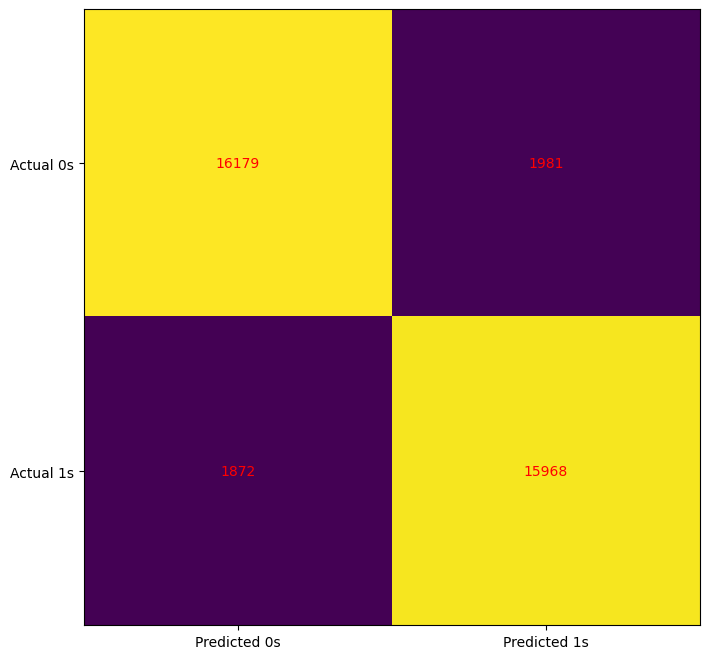

In [94]:
confusion_matrix_plot(y_test,y_predict)

In [106]:
# Print classification report for more details
print(classification_report(y_test, y_predict, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.90      0.89      0.89     18160
    Positive       0.89      0.90      0.89     17840

    accuracy                           0.89     36000
   macro avg       0.89      0.89      0.89     36000
weighted avg       0.89      0.89      0.89     36000



## Saving  model

In [119]:
import pickle
filename = 'sentiment_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

## Create a function to predict sentiment:

In [120]:
def predict_sentiment(review_text):
    # 1. Preprocess the input review
    review_text = data_cleaning(review_text)

    # 2. Transform the preprocessed review using the trained vectorizer
    review_vectorized = tfidfvect.transform([review_text])

    # 3. Predict the sentiment using the loaded model
    prediction = best_model.predict(review_vectorized)[0]
    probability = best_model.predict_proba(review_vectorized)[0][1]  # Probability of positive sentiment

    # 4. Interpret the prediction
    if prediction == '1':
        sentiment = 'Positive'
    else:
        sentiment = 'Negative'

    return sentiment, probability

##  Get user input and predict

In [121]:
user_review = input("Enter your review: ")
sentiment, probability = predict_sentiment(user_review)
print(f"Sentiment: {sentiment} (Probability: {probability:.2f})")

Enter your review: I had high expectations for this film following Deadpool’s 1 and 2, as they were both full of dramatic action scenes and well executed jokes and Deadpool antics.  However… despite the film having two very prominent actors, possibly two of my favourites, the marvel team which has taken over the Deadpool trilogy following the fox takeover seriously let this poorly made film leave me feeling bored and unfulfilled. I couldn’t quite grasp what the directors were trying to achieve when building the plot, However i later discovered the film didn’t have a plot line at all, in fact the movie just continued throwing one action scene after another without allowing the audience (myself) any time to recover and there was seemingly no meaning behind the violence or the jokes made. 
Sentiment: Negative (Probability: 0.37)
